In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from zipfile import ZipFile

import datetime
import json
import re
from tqdm import tqdm

import seaborn as sns

In [2]:
pathname = '/home/benjamin/Folders_Python/Weight/imports/'

In [3]:
# Récupère données POIDS

# Source : Withings https://healthmate.withings.com/

# Account > User > Parameters > Download ==> data_BEN_xxxxx.zip ==> contient weight.csv

withings_filename = pathname + "data_BEN.zip"  # données de HealthMate

with ZipFile(withings_filename, 'r') as weight_zip:
    weight_csv = weight_zip.extract('weight.csv', path=pathname)

# extrait la dataframe poids ----------------

colnames = ['Date', 'Poids (kg)', 'Gras (kg)']

df_weight = pd.read_csv(weight_csv, usecols=colnames)
df_weight.rename(columns = {'Poids (kg)' : 'Masse_Totale' , 'Gras (kg)' : 'Masse_Grasse'}, inplace=True)

# transforme le champ str de Date en datetime object

date_format = '%Y-%m-%d %H:%M:%S'

df_weight['Date'] = df_weight['Date'].apply(lambda x : datetime.datetime.strptime(x, date_format).date())
df_weight = df_weight.groupby('Date').mean()

start_date = datetime.date(2020, 8, 1)  # on prend les data depuis le 1er Août 2020

df_weight = df_weight[df_weight.index >= start_date]
df_weight.dropna(inplace=True)

df_weight['Masse_Maigre'] = df_weight['Masse_Totale'] - df_weight['Masse_Grasse']
df_weight['MG%'] = df_weight['Masse_Grasse'] / df_weight['Masse_Totale']
df_weight['BMR'] = 370 + 21.6 * df_weight['Masse_Maigre']

df_weight.sort_index()

,Masse_Totale,Masse_Grasse,Masse_Maigre,MG%,BMR
Date,,,,,
2020-08-09,107.250000,37.190000,70.060,0.346760,1883.2960
2020-08-11,104.650000,33.150000,71.500,0.316770,1914.4000
2020-08-12,104.350000,33.800000,70.550,0.323910,1893.8800
2020-08-13,104.400000,34.340000,70.060,0.328927,1883.2960
2020-08-14,104.500000,33.850000,70.650,0.323923,1896.0400
...,...,...,...,...,...
2023-01-01,71.800000,10.900000,60.900,0.151811,1685.4400
2023-01-02,71.200000,10.900000,60.300,0.153090,1672.4800
2023-01-03,71.900000,10.900000,61.000,0.151599,1687.6000


In [4]:
df_weight.tail(10)

,Masse_Totale,Masse_Grasse,Masse_Maigre,MG%,BMR
Date,,,,,
2022-12-27,72.680000,11.192000,61.488000,0.153990,1698.1408
2022-12-28,72.018750,11.908750,60.110000,0.165356,1668.3760
2022-12-29,71.566667,11.422222,60.144444,0.159603,1669.1200
2022-12-30,71.310000,11.210000,60.100000,0.157201,1668.1600
2022-12-31,71.810000,10.890000,60.920000,0.151650,1685.8720
2023-01-01,71.800000,10.900000,60.900000,0.151811,1685.4400
2023-01-02,71.200000,10.900000,60.300000,0.153090,1672.4800
2023-01-03,71.900000,10.900000,61.000000,0.151599,1687.6000
2023-01-04,72.560000,10.838000,61.722000,0.149366,1703.1952


In [5]:
# Récupère données FOOD

# https://www.myfitnesspal.com/reports

# www.myfitnesspal.com ==> reports > export data ==> File-Export-date1-to-date2.zip

mfp_filename = pathname + "File-Export.zip" # données de My Fitness Pal

# Extrait les archives
    
with ZipFile(mfp_filename, 'r') as food_zip:
    output_dir = food_zip.namelist()
    target = 'Nutrition-Summary'
    for l in output_dir:
        if l[:len(target)] == target:
            food_csv = food_zip.extract(l, path=pathname)
            break
        
# extrait la dataframe food -------------------------------

colnames = ['Date', 'Meal', 'Calories', 'Fat (g)', 'Carbohydrates (g)', 'Protein (g)']

df_food = pd.read_csv(food_csv, usecols=colnames)
df_food.rename(columns = {'Fat (g)' : 'Lipides' , 'Carbohydrates (g)' : 'Glucides', 'Protein (g)' : 'Proteines'}, inplace=True)

# transforme le champ str de Date en datetime object

date_format = '%Y-%m-%d'

df_food['Date'] = df_food['Date'].apply(lambda x : datetime.datetime.strptime(x, date_format).date())
df_food = df_food.groupby('Date').sum()

start_date = datetime.date(2020, 8, 1)  # on prend les data depuis le 1er Août 2020

df_food = df_food[df_food.index >= start_date]
df_food.dropna(inplace=True)
df_food.sort_index()

,Calories,Lipides,Glucides,Proteines
Date,,,,
2020-08-03,1917.0,89.7,194.8,73.0
2020-08-04,1992.7,67.7,267.5,78.4
2020-08-05,1948.9,84.1,213.1,86.9
2020-08-06,1937.2,66.4,132.9,60.0
2020-08-07,1674.0,67.5,166.2,95.2
...,...,...,...,...
2023-01-01,1726.4,38.4,152.0,195.1
2023-01-02,2044.6,47.1,233.7,173.5
2023-01-03,1822.0,29.3,161.4,231.1


In [6]:
df_food.tail(10)

,Calories,Lipides,Glucides,Proteines
Date,,,,
2022-12-27,1611.4,37.5,120.1,189.5
2022-12-28,1767.4,39.0,180.2,166.6
2022-12-29,1784.0,33.7,179.0,189.0
2022-12-30,1666.7,36.4,141.3,191.9
2022-12-31,3197.2,66.4,424.4,203.1
2023-01-01,1726.4,38.4,152.0,195.1
2023-01-02,2044.6,47.1,233.7,173.5
2023-01-03,1822.0,29.3,161.4,231.1
2023-01-04,1743.6,32.9,166.7,194.1


In [7]:
def extract_data_training(exo_dict):
    # utility fonction pour récupérer : date, durée, type exercice et calories dépensées
    
    # récupère date
    pattern = '2(\d){3,3}-(\d){2,2}-(\d){2,2}'  # on cherche une date du type 2xxx-yy-zz
    p = re.compile(pattern)
    m = p.search(exo_dict.get('startTime'))
    if m: 
        time_format = '%Y-%m-%d'
        exo_date = datetime.datetime.strptime( exo_dict.get('startTime')[:10], time_format ).date()
    
    # récupère durée
    pattern = '(\d)+[.]?(\d)*'  # on cherche une durée du type xxxx.yyyy
    p = re.compile(pattern)
    m = p.search(exo_dict.get('duration'))
    if m:
        exo_duration = float(m.group())
    
    # récupère type activité et calories dépensées
    d = exo_dict.get('exercises')[0]   
    exo_type = d.get('sport')
    if d.get('kiloCalories'):
        exo_cals = float(d.get('kiloCalories'))
    else:
        exo_cals = 0.0
    
    return exo_date, exo_duration, exo_type, exo_cals

In [8]:
# Récupère les données EXERCICE

# https://account.polar.com/#export ==> polar-user-data-export-xxxxx.zip

polar_filename = pathname + "polar-user-data-export.zip"  # données de HealthMate

with ZipFile(polar_filename, 'r') as polar_zip:
    output_dir = polar_zip.namelist()
    
    target = 'training-session'
    dict_all_exos = {}
    for i, enr_name in enumerate(tqdm(output_dir)): # on parcourt la liste des archives
        if enr_name[:len(target)] == target:  # si c'est un enregistrement d'une session de training, on traite
            enr_json = polar_zip.extract(enr_name, path=pathname)   # extraction du json
            with open(enr_json, 'r') as f:
                exo_dict = json.load(f)
                exo_date, exo_duration, exo_type, exo_cals = extract_data_training(exo_dict)
                if dict_all_exos.get(exo_date) == None:
                    dict_all_exos[exo_date] = [ exo_duration, exo_cals]
                else:
                    dict_all_exos[exo_date] = [ dict_all_exos[exo_date][0] + exo_duration, dict_all_exos[exo_date][1] + exo_cals ]
                # print(f'exercice {i+1} : date = {exo_date}, durée = {exo_duration}, type = {exo_type}, cals = {exo_cals}')
            os.remove(enr_json)
    
    df_exos = pd.DataFrame.from_dict(dict_all_exos, orient='index', columns=['exo_duree', 'exo_cals_bruts']).sort_index()

100%|██████████| 632/632 [00:12<00:00, 49.61it/s]


In [9]:
df_exos.tail(20)

,exo_duree,exo_cals_bruts
2022-12-08,2160.295,355.0
2022-12-09,4525.056,798.0
2022-12-11,3921.482,538.0
2022-12-12,3660.598,310.0
2022-12-13,3120.471,364.0
2022-12-14,2880.614,310.0
2022-12-15,3970.997,448.0
2022-12-16,3360.712,355.0
2022-12-18,3900.587,548.0
2022-12-20,4380.588,614.0


In [10]:
df_all = pd.concat( [df_weight, df_food, df_exos], axis=1 ).sort_index()

# remplace les NaN dans les colonnes exercice par 0.0 : jour sans exercice
df_all['exo_duree'].fillna(0.0, inplace=True)
df_all['exo_cals_bruts'].fillna(0.0, inplace=True)

# drop les jours où il manque des données autres que les exercices
df_all.dropna(inplace=True)

In [44]:
def exo_cals_nets(bmr, exo_duree, exo_cals_bruts):
    if exo_cals_bruts > 0:
        ecn = exo_cals_bruts - bmr / (24*60*60) * exo_duree
    else:
        ecn = 0.0
        
    return ecn

df_all['exo_cals_nets'] = np.where(df_all['exo_cals_bruts'] > 0, df_all['exo_cals_bruts'] - df_all['BMR'] / (24*60*60) * df_all['exo_duree'], 0 )

In [52]:
df_all['cal_deficit'] = df_all['Calories'] - (df_all['BMR'] + df_all['exo_cals_nets'])

In [53]:
df_all.head(20)

,Masse_Totale,Masse_Grasse,Masse_Maigre,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,cal_deficit
2020-08-09,107.250,37.190000,70.060000,0.346760,1883.296,1861.3,71.3,232.5,66.1,0.0,0.0,0.0,-21.996
2020-08-11,104.650,33.150000,71.500000,0.316770,1914.400,1772.4,50.5,185.0,104.1,0.0,0.0,0.0,-142.000
2020-08-12,104.350,33.800000,70.550000,0.323910,1893.880,1894.3,59.3,220.3,87.5,0.0,0.0,0.0,0.420
2020-08-13,104.400,34.340000,70.060000,0.328927,1883.296,1822.6,71.5,222.6,70.2,0.0,0.0,0.0,-60.696
2020-08-14,104.500,33.850000,70.650000,0.323923,1896.040,1891.5,61.8,216.7,82.5,0.0,0.0,0.0,-4.540
2020-08-15,104.250,34.280000,69.970000,0.328825,1881.352,1925.3,83.5,186.7,68.9,0.0,0.0,0.0,43.948
2020-08-16,104.050,34.430000,69.620000,0.330899,1873.792,2021.7,92.8,216.2,81.4,0.0,0.0,0.0,147.908
2020-08-17,103.900,33.880000,70.020000,0.326083,1882.432,1946.5,66.2,232.1,72.5,0.0,0.0,0.0,64.068
2020-08-18,103.550,34.130000,69.420000,0.329599,1869.472,1789.5,51.9,220.6,100.9,0.0,0.0,0.0,-79.972
2020-08-19,103.250,32.650000,70.600000,0.316223,1894.960,1914.8,69.9,179.6,86.0,0.0,0.0,0.0,19.840


In [54]:
df_all.describe(include='all')

,Masse_Totale,Masse_Grasse,Masse_Maigre,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,cal_deficit
count,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000,863.000000
mean,74.529506,12.557498,61.972008,0.162049,1708.595369,1990.152260,55.044148,201.223754,153.348667,2563.454355,284.451912,234.818349,46.738541
std,9.239347,6.170352,3.149719,0.052612,68.033938,422.292103,20.547527,70.431931,39.670823,2982.098230,318.483577,269.851724,439.894470
min,66.000000,7.541667,58.164286,0.112927,1626.348571,249.700000,2.900000,30.200000,16.400000,0.000000,0.000000,-456.053333,-1842.676979
25%,68.765000,8.659615,59.883846,0.125776,1663.491077,1802.300000,41.700000,160.350000,127.000000,0.000000,0.000000,0.000000,-144.597890
50%,70.090000,9.498000,60.726000,0.135719,1681.681600,1871.000000,52.000000,188.000000,155.900000,1876.669000,210.000000,158.403088,16.648595
75%,76.845833,13.945000,62.743333,0.182740,1725.256000,2055.800000,65.850000,226.500000,181.650000,4967.841000,538.500000,446.461168,136.743000
max,107.250000,37.190000,72.360000,0.346760,1932.976000,5762.000000,235.900000,862.900000,267.100000,28800.000000,2290.000000,2017.785132,4103.438500


In [55]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 863 entries, 2020-08-09 to 2023-01-05
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Masse_Totale    863 non-null    float64
 1   Masse_Grasse    863 non-null    float64
 2   Masse_Maigre    863 non-null    float64
 3   MG%             863 non-null    float64
 4   BMR             863 non-null    float64
 5   Calories        863 non-null    float64
 6   Lipides         863 non-null    float64
 7   Glucides        863 non-null    float64
 8   Proteines       863 non-null    float64
 9   exo_duree       863 non-null    float64
 10  exo_cals_bruts  863 non-null    float64
 11  exo_cals_nets   863 non-null    float64
 12  cal_deficit     863 non-null    float64
dtypes: float64(13)
memory usage: 126.7+ KB


In [56]:
df_all.tail(20)

,Masse_Totale,Masse_Grasse,Masse_Maigre,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,cal_deficit
2022-12-17,70.871429,10.765714,60.105714,0.151905,1668.283429,1511.9,26.7,263.1,53.3,0.000,0.0,0.000000,-156.383429
2022-12-18,71.425000,10.626667,60.798333,0.148781,1683.244000,2119.0,79.3,243.2,108.7,3900.587,548.0,472.008800,-36.252800
2022-12-19,70.450000,10.530000,59.920000,0.149468,1664.272000,1696.1,49.4,147.0,156.6,0.000,0.0,0.000000,31.828000
2022-12-20,70.611111,10.543333,60.067778,0.149315,1667.464000,1737.8,51.5,139.9,141.0,4380.588,614.0,529.457491,-459.121491
2022-12-21,70.937500,10.512500,60.425000,0.148194,1675.180000,1859.2,35.9,187.7,160.3,3660.616,499.0,428.025570,-244.005570
2022-12-22,70.650000,10.480000,60.170000,0.148337,1669.672000,2215.5,87.6,154.4,195.4,4080.610,530.0,451.142590,94.685410
2022-12-23,70.560000,10.554000,60.006000,0.149575,1666.129600,3391.8,112.9,425.9,159.5,0.000,0.0,0.000000,1725.670400
2022-12-24,72.500000,10.766000,61.734000,0.148497,1703.454400,2477.3,93.1,260.4,132.0,4514.618,554.0,464.990210,308.855390
2022-12-25,72.478571,11.037143,61.441429,0.152281,1697.134857,1850.3,34.7,166.0,160.7,4404.837,530.0,443.476824,-290.311681
2022-12-26,71.950000,10.984286,60.965714,0.152666,1686.859429,2328.3,58.3,273.1,173.1,4260.740,598.0,514.814011,126.626560


# Graphes

In [57]:
vars = ['Masse_Totale', 'MG%', 'BMR', 'Calories', 'cal_deficit']

In [69]:
df_all2.tail(20)

,Masse_Totale,Masse_Grasse,Masse_Maigre,MG%,BMR,Calories,Lipides,Glucides,Proteines,exo_duree,exo_cals_bruts,exo_cals_nets,cal_deficit
2022-12-17,70.577381,10.553452,60.023929,0.149523,1666.516857,2091.866667,61.633333,246.766667,136.333333,2.443903e+03,267.666667,2.205595e+02,204.790273
2022-12-18,70.990476,10.649960,60.340516,0.150022,1673.355143,2180.033333,74.666667,261.666667,114.600000,2.420433e+03,301.000000,2.540358e+02,252.642370
2022-12-19,70.915476,10.640794,60.274683,0.150051,1671.933143,1775.666667,51.800000,217.766667,106.200000,1.300196e+03,182.666667,1.573363e+02,-53.602743
2022-12-20,70.828704,10.566667,60.262037,0.149188,1671.660000,1850.966667,60.066667,176.700000,135.433333,2.760392e+03,387.333333,3.338221e+02,-154.515430
2022-12-21,70.666204,10.528611,60.137593,0.148992,1668.972000,1764.366667,45.600000,158.200000,152.633333,2.680401e+03,371.000000,3.191610e+02,-223.766354
2022-12-22,70.732870,10.511944,60.220926,0.148615,1670.772000,1937.500000,58.333333,160.666667,165.566667,4.040605e+03,547.666667,4.695419e+02,-202.813884
2022-12-23,70.715833,10.515500,60.200333,0.148702,1670.327200,2488.833333,78.800000,256.000000,171.733333,2.580409e+03,343.000000,2.930561e+02,525.450080
2022-12-24,71.236667,10.600000,60.636667,0.148803,1679.752000,2694.866667,97.866667,280.233333,162.300000,2.865076e+03,361.333333,3.053776e+02,709.737067
2022-12-25,71.846190,10.785714,61.060476,0.150118,1688.906286,2573.133333,80.233333,284.100000,150.733333,2.973152e+03,361.333333,3.028223e+02,581.404703
2022-12-26,72.309524,10.929143,61.380381,0.151148,1695.816229,2218.633333,62.033333,233.166667,155.266667,4.393398e+03,560.666667,4.744270e+02,48.390090


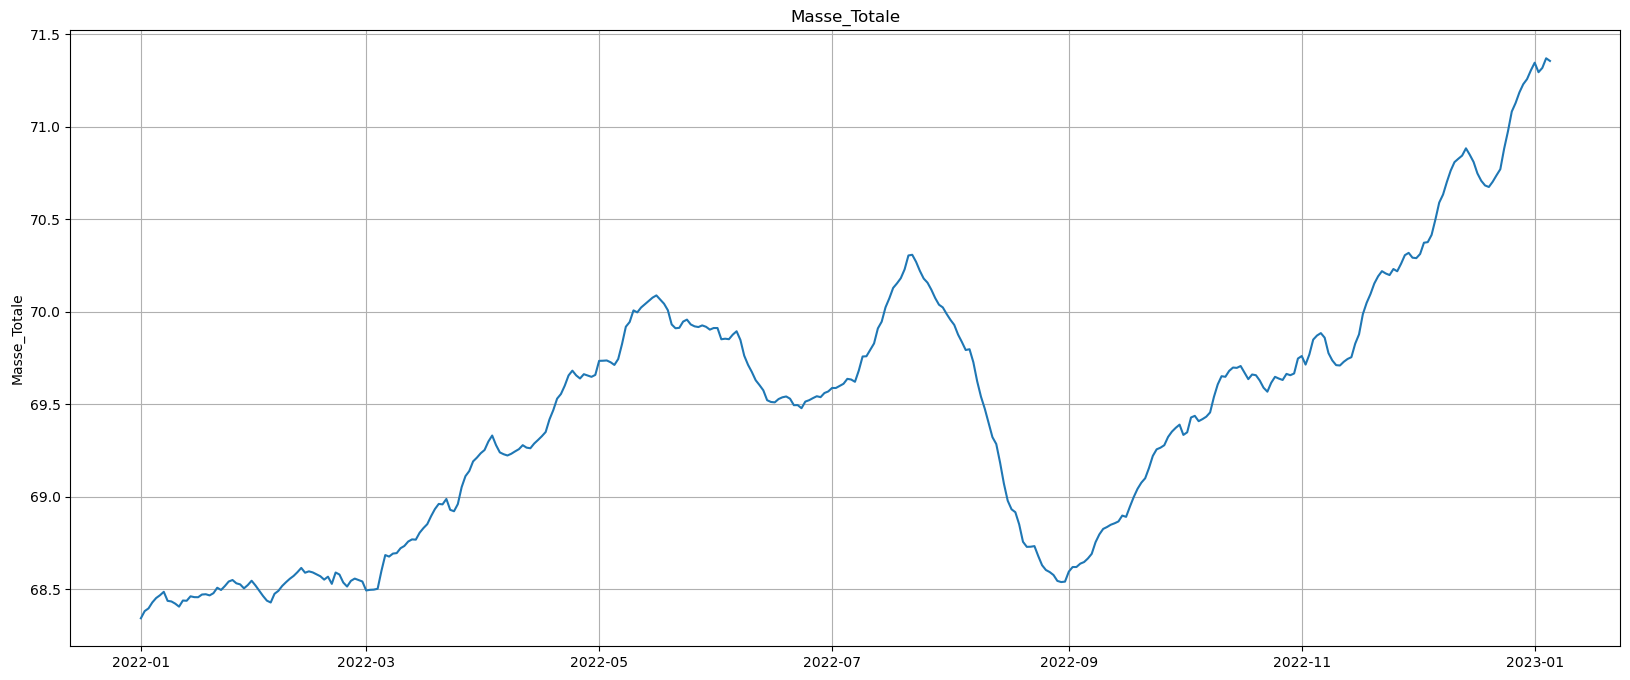

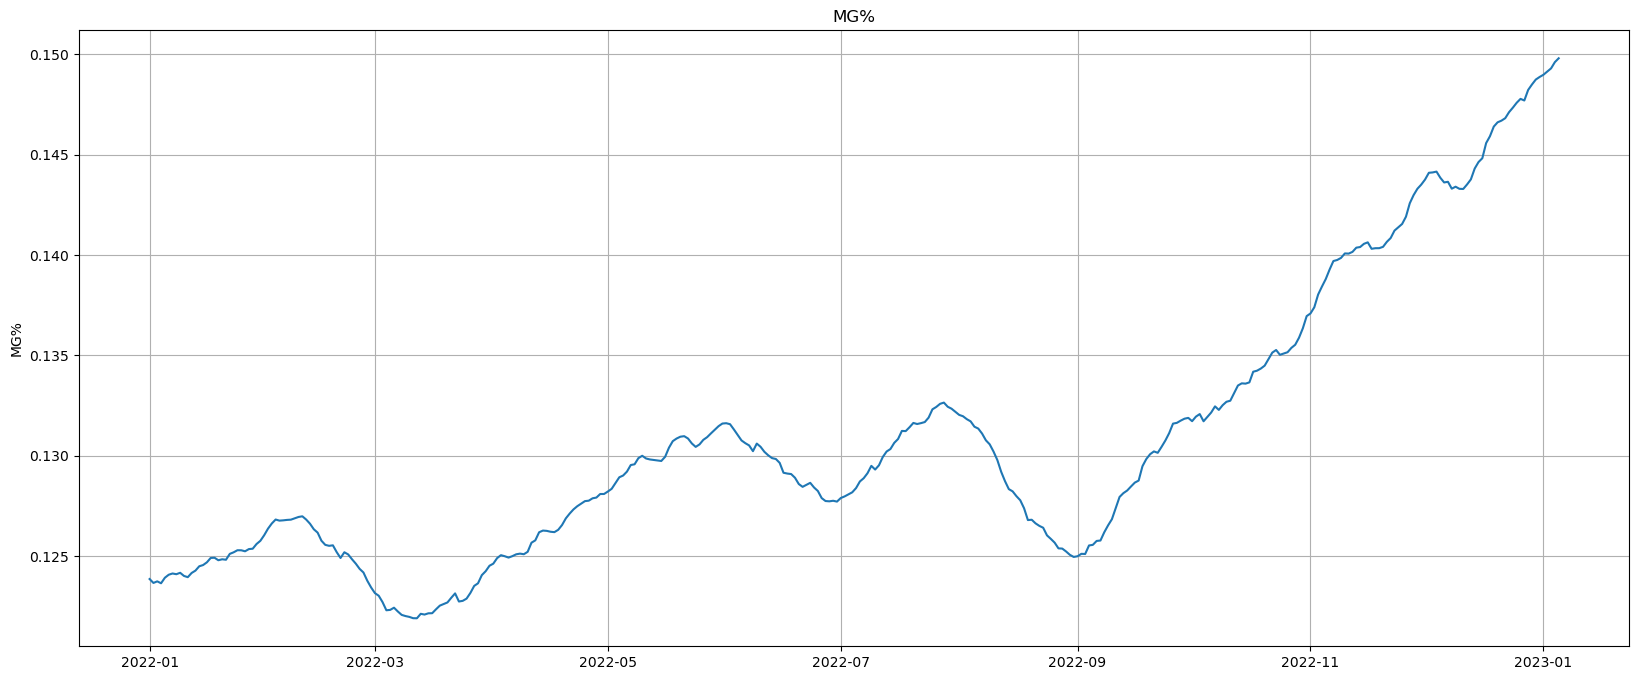

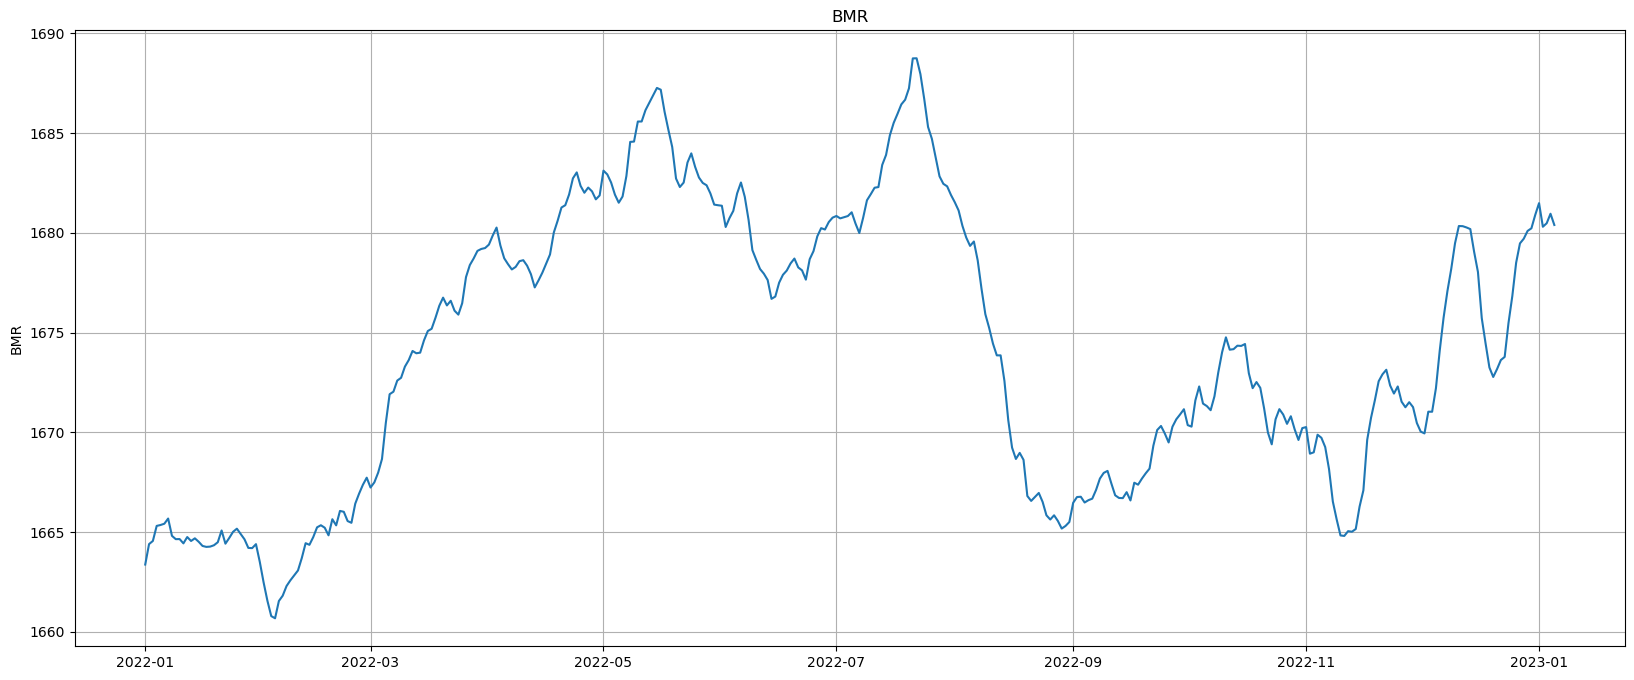

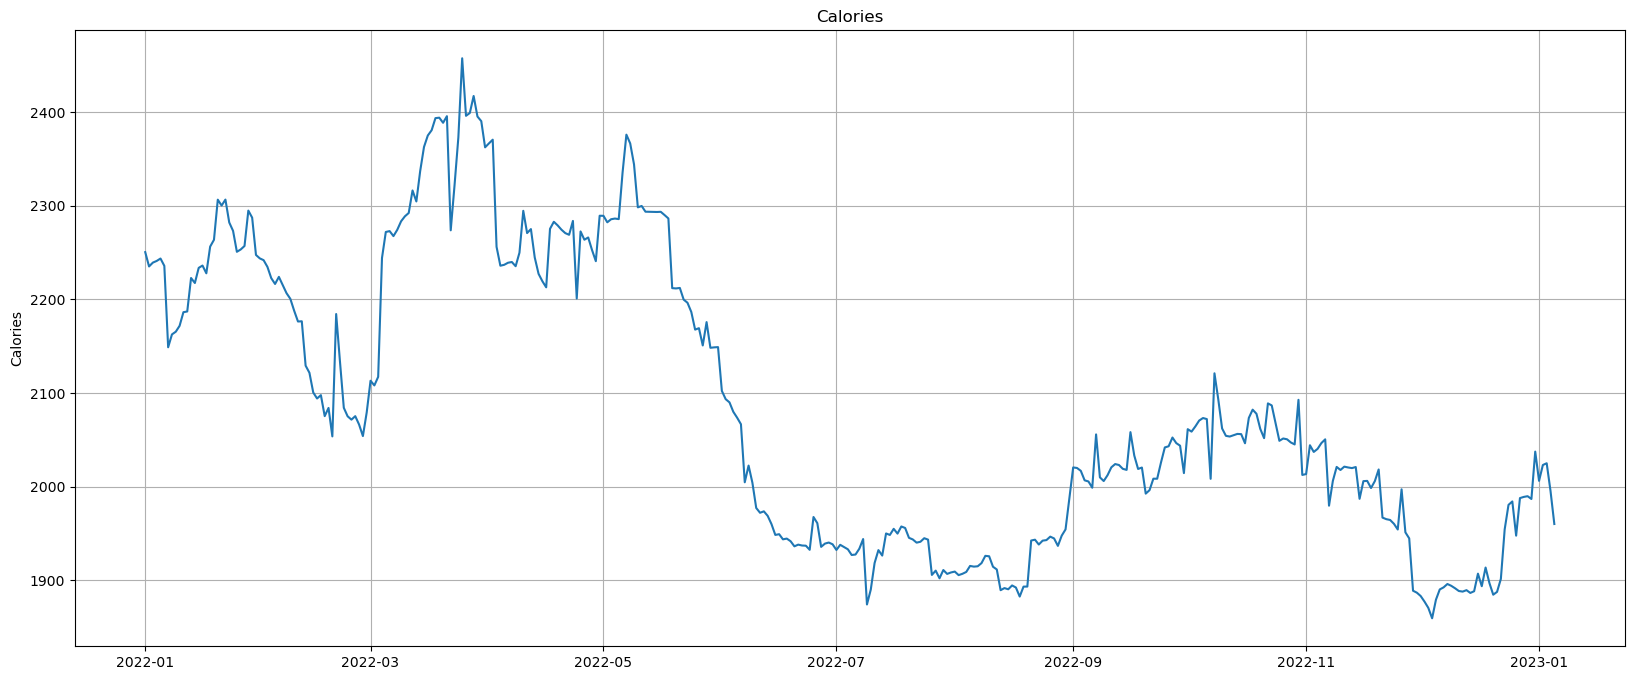

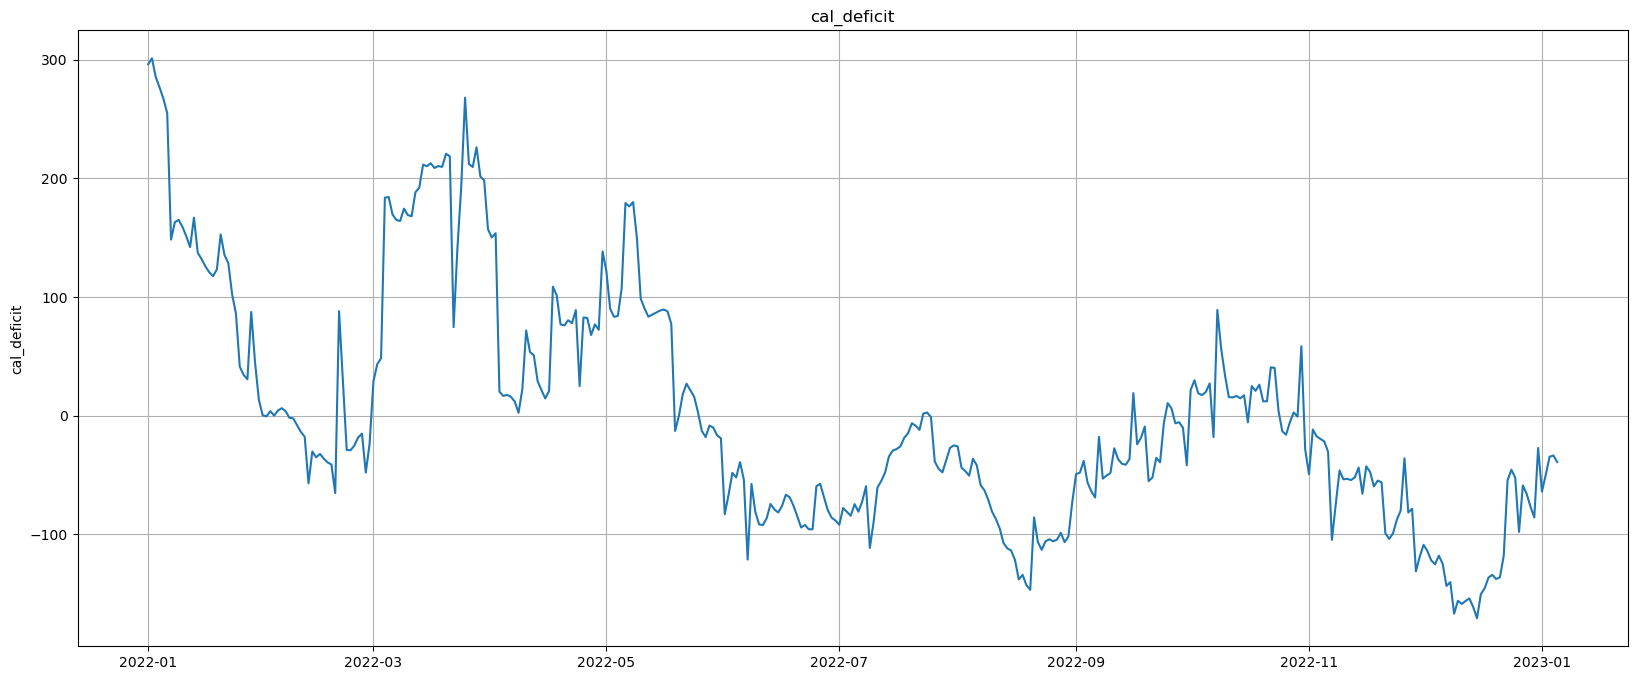

In [74]:
longueur = 30
df_all2 = df_all.rolling(longueur).mean().dropna()

year = 2022
month = 1
day = 1
start_date = datetime.date(year=year, month=month, day=day)

df_all2 = df_all2[df_all2.index >= start_date]

for v in vars:
    fig, ax = plt.subplots(figsize=(20,8))

    ax = sns.lineplot(data=df_all2, x=df_all2.index, y=v)
    ax.set_title(v)
    ax.grid()